In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
plt.style.use('seaborn-whitegrid')

In [2]:
df=pd.read_excel('http://taanila.fi/Concrete_Data.xlsx')

df.columns=['Cement','Slag','Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 
            'Fine Aggregate', 'Age (day)', 'Compressive Strength']

df.head()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
#X=features, y=target
X1=df[['Cement','Slag','Fly Ash', 'Water', 'Superplasticizer',
      'Coarse Aggregate', 'Fine Aggregate', 'Age (day)',]]
y1=df['Compressive Strength']

In [4]:
#Sovitetaan selitettävät- ja ennustettavat muuttujat malliin
malli1 = LinearRegression()
malli1.fit(X1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
a = malli1.intercept_
b = malli1.coef_
c = malli1.score(X1,y1)

print('Regressiosuoran vakiotermi: {}'.format(a) + "\n")
print('Regressiosuoran kulmakerroin: {}'.format(b) + "\n")
print('Mallin selityskerroin: {}'.format(c) + "\n")

Regressiosuoran vakiotermi: -23.16375581107919

Regressiosuoran kulmakerroin: [ 0.11978526  0.10384725  0.08794308 -0.1502979   0.29068694  0.01803018
  0.02015446  0.11422562]

Mallin selityskerroin: 0.6154647342687214



Text(0, 0.5, 'Poikkeama todellisesta')

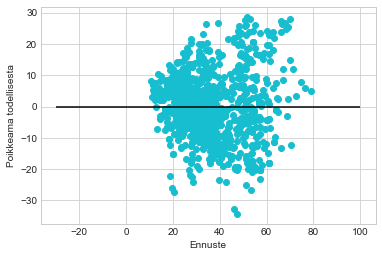

In [6]:
#Mallin virhetermit:
plt.scatter(malli1.predict(X1), malli1.predict(X1)-y1, color='C9')

#Vaakaviiva nollapoikkeaman kohdalle:
plt.hlines(y=0,xmin=-30,xmax=100)

plt.xlabel('Ennuste')
plt.ylabel('Poikkeama todellisesta')

Text(0, 0.5, 'Ennuste')

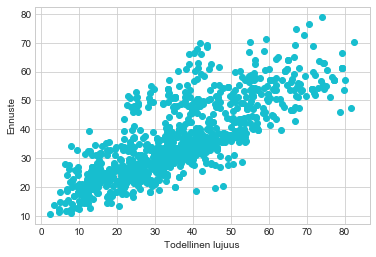

In [7]:
#Betonin todellisen lujuuden ja mallin antamien ennusteiden vastaavuus:
plt.scatter(df['Compressive Strength'], malli1.predict(X1), color='C9')

plt.xlabel('Todellinen lujuus')
plt.ylabel('Ennuste')

C:\Users\Oem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


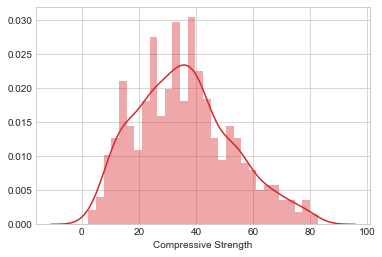

In [8]:
#Target-muuttujan eli selitettävän muuttujan jakauma:
sns.distplot(df['Compressive Strength'], bins=30, color = 'C3')

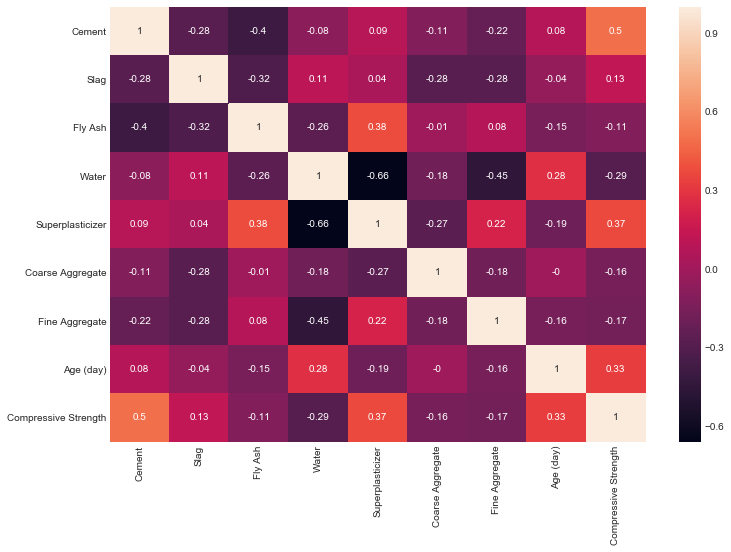

In [9]:
#Riippuvuuksien tarkastelua korrelaatiokertoimien avulla:
korrelaatiot1 = df.corr().round(2)

#Luodaan kuvio, jonka sisään heatmap laitetaan
plt.figure(figsize=(12,8))

sns.heatmap(data=korrelaatiot1, annot=True)

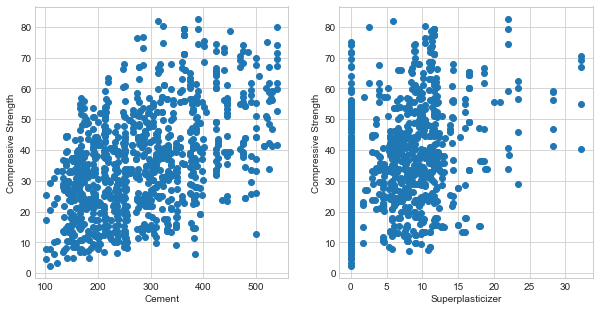

In [10]:
#Valitaan malliin kaksi muuttujaa, jotka korreloivat eniten betonin lujuuden kanssa
features1 = ['Cement', 'Superplasticizer']

target1 = df['Compressive Strength']

#Lisätään kuvio, jonka sisään sijoitetaan kaksi hajontakuvioita
plt.figure(figsize=(10, 5))

for i, feature in enumerate(features1):
    plt.subplot(1, len(features1) , i+1)
    plt.scatter(df[feature],target1)
    plt.xlabel(feature)
    plt.ylabel('Compressive Strength')

In [11]:
#Uusi feature-matriisi
X = df[['Cement', 'Superplasticizer']]
y = df['Compressive Strength'] #Target

In [12]:
#jaetaan data testidataan ja opetusdataan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(824, 2)
(206, 2)
(824,)
(206,)


In [13]:
#Sovitetaan lineaarinen regressiomalli opetusdataan
malli = LinearRegression()
malli.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
a = malli.intercept_
b = malli.coef_

print('Regressiosuoran vakiotermi: {}'.format(a) + "\n")
print('Regressiosuoran kulmakerroin: {}'.format(b) + "\n")

Regressiosuoran vakiotermi: 8.192886464334965

Regressiosuoran kulmakerroin: [0.07782282 0.90311833]



In [15]:
#Mallin luotettavuuteen liittyvää statistiikkaa:
#Opetusdata
y_train_predict = malli.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = malli.score(X_train,y_train)

#Testidata
y_test_predict = malli.predict(X_test)
rmse1 = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r21 = malli.score(X_test, y_test)

print('Mallin sopivuus opetusdataan: Keskivirhe = {}'.format(rmse))
print('                              Selityskerroin = {}'.format(r2) + "\n")
print('Mallin sopivuus Testidataan:  Keskivirhe = {}'.format(rmse1))
print('                              Selityskerroin = {}'.format(r21))

Mallin sopivuus opetusdataan: Keskivirhe = 13.54606689084437
                              Selityskerroin = 0.366972034303492

Mallin sopivuus Testidataan:  Keskivirhe = 13.08627928697203
                              Selityskerroin = 0.2698392272975554


C:\Users\Oem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


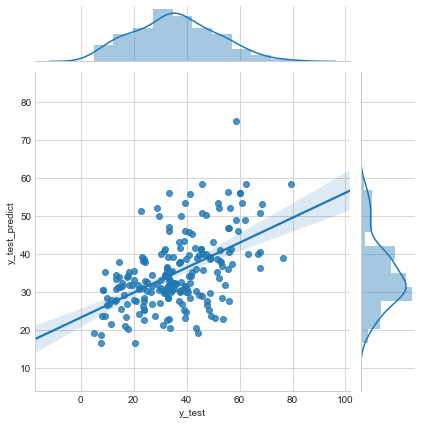

In [16]:
#Verrataan testidatan havaintoja mallin antamiin ennusteisiin:

#Luodaan ensin dataframe testiaineiston havainnoista ja mallin antamista ennusteista
test = pd.DataFrame()
test['y_test'] = y_test
test['y_test_predict'] = y_test_predict

sns.jointplot(data=test, x='y_test',y='y_test_predict',kind='reg')